
## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

#### Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

 
#### Definitions of Churn

There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

##### Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the usage-based definition to define churn.

##### High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.
 

##### Understanding the Business Objective and the Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.


#### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.




### Approach and Steps 

##### 1. Reading Data and Basic Understanding 

##### 2. Data Cleaning - Missing data treatment

##### 3. EDA, Data Visualization and Outliers treatment

##### 4. Feature Engineering

##### 5. Data preparation Before Modeling
##### 6. Building Models - Logistic Regression, SVM, Random Forests, XGBoost
##### 7. Model Selection and Prediction on Test Data
##### 8. Conclusions
##### 9. Notes On Some Extra Learning - CalibratedClassifierCV and "probability=True" in SVM

##### Some common helper functions that we will use repeatedly throughout this case study

In [1]:
# create plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

In [2]:
#### Function to print confusion matrix, accuracy, sensitivity, FPR, precision, specificity etc

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

def print_binary_classification_summary(y, y_pred):
    
    confusion = metrics.confusion_matrix(y, y_pred)
    
    print("\n\nConfusion Matrix :\n\n", confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    sensitivity = TP / float(TP+FN)
    specificity = TN / float(TN+FP)
    fpr = FP/ float(TN+FP)
    precision = TP / float(TP+FP)
    
    print("\nTN :", TN)
    print("\nFP :", FP)
    print("\nFN :", FN)
    print("\nTP :", TP)
       
    print("\nACCURACY : ", float(TP + TN)/float(TP + TN + FP + FN))
    
    print("\nSENSITIVITY : ", sensitivity)
    
    print("\nPRECISION : ", precision)
    
    print("\nFALSE POSITIVITY RATE : ", fpr)
    
    print("\nSPECIFICITY : ", specificity)
    
    print("\n\n Classification Report :\n\n", classification_report(y, y_pred))

In [3]:
#### Function to plot ROC

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.3f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    print("\nAUC SCORE = %0.3f" % auc_score)
    
    return auc_score

In [4]:
##### Function to predict - Both classification labels and probabilities.

def predict_and_proba(model, X):
    y_pred = model.predict(X)
    y_pred_prob = model.predict_proba(X)
    return y_pred, y_pred_prob

In [5]:
### Function to print grid search results like best scores and best hyper-parameters

def grid_result_summary(grd_res, scoring_measures, refit):
    
    keys= list(scoring_measures.keys())
    score_print_list = []
    for key in keys:
        score_print_list.append('mean_test_{}'.format(key))
    
    refit = 'mean_test_{}'.format(refit)
    print(refit)
    #print(score_print_list)
        
    #str = 'mean_test_{}'.format(keys[0])
    
    # scores of GridSearch CV
    scores = pd.DataFrame(grd_res.cv_results_)
    
    # print best hyperparameters
    print("\nBest hyperparameters: ", grd_res.best_params_)
    
   
    print("\nBest Score : %0.5f" % grd_res.best_score_)
    
    #print(scores.loc[scores.mean_test_AUC == grd_res.best_score_ , [str, 'mean_test_Recall', 'mean_test_AUC']])
    print(scores.loc[scores[refit] == grd_res.best_score_ , score_print_list])
    
    return grd_res.best_score_

### 1. Reading Data and Basic Understanding

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("telecom_churn_data.csv", keep_default_na=False, na_values='')
#telecom_df = pd.read_csv("telecom_churn_data.csv")
#telecom_df.head(10)
df.shape

(99999, 226)

In [6]:
df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
### Function to list numeric vars and categorical vars
def sep_num_cat(df):
    numeric_vars = list(df.select_dtypes(include=['float64', 'int64']).columns)
    categorical_vars = list(df.select_dtypes(include=['object', 'category']).columns)
    return numeric_vars, categorical_vars

In [7]:
numeric_vars, categorical_vars = sep_num_cat(df)
print(numeric_vars)
print(categorical_vars)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

#### Drop unnecessary variables - mobile_number, circle_id, last_date_of_month_* etc

In [8]:
telecom_orig = df.copy()

df =  df.drop(['mobile_number', 'circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 
               'last_date_of_month_8', 'last_date_of_month_9'], axis=1)
df.shape

(99999, 220)

In [9]:
print(list(numeric_vars))

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

### 2. Data Cleaning - Missing data treatment

#### Missing values analysis

In [20]:
df[ df.columns[df.isnull().any()] ]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.00,NaN,...,212.17,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN
1,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,24.11,78.68,7.68,18.34,...,7.60,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN
2,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,11.54,55.24,37.26,74.81,...,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
3,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,99.91,54.39,310.98,241.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,50.31,149.44,83.89,58.78,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,5.40,3.36,5.91,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,29.26,18.13,16.06,49.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,1.11,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
99997,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,0.00,...,602.68,725.68,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [25]:
## Function to print details of columns with missing values
def missing_values_details(df):
    return list(zip(df[ df.columns[df.isnull().any()] ].isnull(), 
                    df[ df.columns[df.isnull().any()] ].isnull().sum(),
                    df[ df.columns[df.isnull().any()] ].isnull().sum() / len(df.index) * 100, 
                    df[ df.columns[df.isnull().any()] ].dtypes))

In [26]:
missing_values_details(df)

[('loc_og_t2o_mou', 1018, 1.018010180101801, dtype('float64')),
 ('std_og_t2o_mou', 1018, 1.018010180101801, dtype('float64')),
 ('loc_ic_t2o_mou', 1018, 1.018010180101801, dtype('float64')),
 ('last_date_of_month_7', 601, 0.6010060100601006, dtype('O')),
 ('last_date_of_month_8', 1100, 1.1000110001100012, dtype('O')),
 ('last_date_of_month_9', 1659, 1.6590165901659015, dtype('O')),
 ('onnet_mou_6', 3937, 3.9370393703937037, dtype('float64')),
 ('onnet_mou_7', 3859, 3.859038590385904, dtype('float64')),
 ('onnet_mou_8', 5378, 5.3780537805378055, dtype('float64')),
 ('onnet_mou_9', 7745, 7.745077450774509, dtype('float64')),
 ('offnet_mou_6', 3937, 3.9370393703937037, dtype('float64')),
 ('offnet_mou_7', 3859, 3.859038590385904, dtype('float64')),
 ('offnet_mou_8', 5378, 5.3780537805378055, dtype('float64')),
 ('offnet_mou_9', 7745, 7.745077450774509, dtype('float64')),
 ('roam_ic_mou_6', 3937, 3.9370393703937037, dtype('float64')),
 ('roam_ic_mou_7', 3859, 3.859038590385904, dtype('flo

#### Some variables have more than 70% missing values. Let us separate them out and analyze.

In [27]:
cols_missing_large = [col for col in df.columns if (df[col].isnull().sum() / len(df.index)  > 0.7)]
print(len(cols_missing_large))
cols_missing_large

40


['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

We can see a lot of recharge related variables above.

In [13]:
df.filter(regex='rec|rc').columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'last_day_rch_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_da

#### Analyze the 6th month "date of last data recharge" missing rows and check few related columns for the rows.

In [14]:
df.loc[df.date_of_last_rech_data_6.isnull()][df.filter(regex='rech_data_6|3g_6|2g_6').columns]

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,arpu_3g_6,arpu_2g_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
99992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


Looking at the customers whose date_of_last_rech_data_6 is missing, 
it looks like there are few other recharge related variables which are also missing together with date of last data recharge.

#### Let us check what are the ( if there are ) features which has exactly same number of missing values seen above.

In [15]:
[col for col in df.columns if df[col].isnull().sum()  == 74846]

['date_of_last_rech_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'fb_user_6']

##### It seems these features have missing values together with the missing date_of_last_rech_data_6. Let us check the same way for month 7 and 8 also

In [16]:
df.loc[df.date_of_last_rech_data_7.isnull()][df.filter(regex='rech_data_7|3g_7|2g_7').columns]

,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,arpu_3g_7,arpu_2g_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [17]:
[col for col in df.columns if df[col].isnull().sum()  == 74428]

['date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'fb_user_7']

In [18]:
df.loc[df.date_of_last_rech_data_8.isnull()][df.filter(regex='rech_data_8|3g_8|2g_8').columns]

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [19]:
[col for col in df.columns if df[col].isnull().sum()  == 73660]

['date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'fb_user_8']

In [20]:
df.loc[df.date_of_last_rech_data_9.isnull()][df.filter(regex='rech_data_9|3g_9|2g_9').columns]

,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,arpu_3g_9,arpu_2g_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [21]:
[col for col in df.columns if df[col].isnull().sum()  == 74077]

['date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'fb_user_9']

From the above analysis month wise, we see that a particular group of columns all have missing values together (for the same customers).

date_of_last_rech_data_, 
total_rech_data_9,
max_rech_data_,
count_rech_2g_,
count_rech_3g_,
av_rech_amt_data_,
arpu_3g_,
arpu_2g_,
night_pck_user_,
fb_user_

#### It means those customers have not recharged for data, 2g or 3g etc. So mostly these should be imputed with appropriate values instead of  throwing away these rows which are high in number ( more than 70%).  These look like Missing Not at Random, MNAR category. 
Refer - https://www.theanalysisfactor.com/missing-data-mechanism/#:~:text=Missing%20Completely%20at%20Random%2C%20MCAR,any%20values%2C%20observed%20or%20missing.&text=Missing%20at%20Random%2C%20MAR%2C%20means,but%20not%20the%20missing%20data.

We can delete the date columns, as they would not help much in analysis. 

Let us analyze the other columns out of the above, as 


In [22]:
cols = ['total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 
        'arpu_2g_9', 'night_pck_user_9', 'fb_user_9' ]
df[cols].describe()

,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,fb_user_9
count,25922.000000,25922.00000,25922.000000,25922.000000,25922.000000,25922.000000,25922.000000,25922.000000,25922.000000
mean,2.441170,124.94144,1.781807,0.659363,192.734315,100.264116,93.712026,0.015971,0.860968
std,2.516339,111.36376,2.214701,1.411513,188.400286,216.291992,171.384224,0.125366,0.345987
min,1.000000,1.00000,0.000000,0.000000,1.000000,-71.090000,-45.740000,0.000000,0.000000
25%,1.000000,25.00000,1.000000,0.000000,69.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,145.00000,1.000000,0.000000,164.000000,2.605000,14.800000,0.000000,1.000000
75%,3.000000,179.00000,2.000000,1.000000,252.000000,140.010000,140.010000,0.000000,1.000000
max,84.000000,1555.00000,40.000000,49.000000,4061.000000,13884.310000,3467.170000,1.000000,1.000000


Looking at the above data, the following columns - 
'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9'
either have minumum value either as 1 or 0. So we can impute the missing values ( not recharged for that month) as zero.

'night_pck_user_9', 'fb_user_9' look categorical with values either 0 or 1 only. Let us address these later.


In [23]:
impute_zero_cols = df.filter(regex='total_rech_data|max_rech_data|count_rech_2g|count_rech_3g|av_rech_amt_data').columns
impute_zero_cols
#impute_zero_cols = ['max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9']

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [24]:
cols_to_be_del = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

In [25]:
df = df.drop(cols_to_be_del, axis=1)
df.shape

(99999, 216)

In [26]:
df[impute_zero_cols] = df[impute_zero_cols].fillna(0)
df.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=216)

In [27]:
missing_values_details(df)

[('loc_og_t2o_mou', 1018, 1.018010180101801, dtype('float64')),
 ('std_og_t2o_mou', 1018, 1.018010180101801, dtype('float64')),
 ('loc_ic_t2o_mou', 1018, 1.018010180101801, dtype('float64')),
 ('onnet_mou_6', 3937, 3.9370393703937037, dtype('float64')),
 ('onnet_mou_7', 3859, 3.859038590385904, dtype('float64')),
 ('onnet_mou_8', 5378, 5.3780537805378055, dtype('float64')),
 ('onnet_mou_9', 7745, 7.745077450774509, dtype('float64')),
 ('offnet_mou_6', 3937, 3.9370393703937037, dtype('float64')),
 ('offnet_mou_7', 3859, 3.859038590385904, dtype('float64')),
 ('offnet_mou_8', 5378, 5.3780537805378055, dtype('float64')),
 ('offnet_mou_9', 7745, 7.745077450774509, dtype('float64')),
 ('roam_ic_mou_6', 3937, 3.9370393703937037, dtype('float64')),
 ('roam_ic_mou_7', 3859, 3.859038590385904, dtype('float64')),
 ('roam_ic_mou_8', 5378, 5.3780537805378055, dtype('float64')),
 ('roam_ic_mou_9', 7745, 7.745077450774509, dtype('float64')),
 ('roam_og_mou_6', 3937, 3.9370393703937037, dtype('float6

Let's take a updated look at which columns have more than 70% missing values now

In [28]:
cols_missing_large = [col for col in df.columns if (df[col].isnull().sum() / len(df.index))  > 0.7]
print(len(cols_missing_large))
cols_missing_large

16


['arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [29]:
df.night_pck_user_6.describe()

count    25153.000000
mean         0.025086
std          0.156391
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_6, dtype: float64

In [30]:
df.fb_user_6.describe()

count    25153.000000
mean         0.914404
std          0.279772
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: fb_user_6, dtype: float64

#### Both night_pck_user_ and fb_user_ look categorical with just two values 0 and 1. 
##### Let's NOT drop these columns because of higher missing values percentage. Instead, we can have missing as a separate category -1.

In [31]:
night_fb_missing = df.filter(regex="fb_user|night_pck").columns
#night_fb_missing
df[night_fb_missing] = df[night_fb_missing].fillna(-1)
#df.columns

In [32]:
df.fb_user_9.describe()

count    99999.000000
mean        -0.517595
std          0.834303
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          0.000000
max          1.000000
Name: fb_user_9, dtype: float64

In [33]:
cols_missing_large = [col for col in df.columns if (df[col].isnull().sum() / len(df.index)) > 0.7]
print(len(cols_missing_large))
cols_missing_large

8


['arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [34]:
df.arpu_3g_6.describe()

count    25153.000000
mean        89.555057
std        193.124653
min        -30.820000
25%          0.000000
50%          0.480000
75%        122.070000
max       6362.280000
Name: arpu_3g_6, dtype: float64

##### Let us remove the remaining columns which has more than 70% missing values.

In [35]:
df = df.drop(cols_missing_large, axis=1)

In [36]:
numeric_vars, categorical_vars = sep_num_cat(df)
print(numeric_vars)
print(categorical_vars)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', '

In [37]:
df = df.drop(df.filter(regex='date_of').columns, axis=1)

In [38]:
miss_columns = missing_values_details(df)
miss_columns

[('loc_og_t2o_mou', 1018, 1.018010180101801, dtype('float64')),
 ('std_og_t2o_mou', 1018, 1.018010180101801, dtype('float64')),
 ('loc_ic_t2o_mou', 1018, 1.018010180101801, dtype('float64')),
 ('onnet_mou_6', 3937, 3.9370393703937037, dtype('float64')),
 ('onnet_mou_7', 3859, 3.859038590385904, dtype('float64')),
 ('onnet_mou_8', 5378, 5.3780537805378055, dtype('float64')),
 ('onnet_mou_9', 7745, 7.745077450774509, dtype('float64')),
 ('offnet_mou_6', 3937, 3.9370393703937037, dtype('float64')),
 ('offnet_mou_7', 3859, 3.859038590385904, dtype('float64')),
 ('offnet_mou_8', 5378, 5.3780537805378055, dtype('float64')),
 ('offnet_mou_9', 7745, 7.745077450774509, dtype('float64')),
 ('roam_ic_mou_6', 3937, 3.9370393703937037, dtype('float64')),
 ('roam_ic_mou_7', 3859, 3.859038590385904, dtype('float64')),
 ('roam_ic_mou_8', 5378, 5.3780537805378055, dtype('float64')),
 ('roam_ic_mou_9', 7745, 7.745077450774509, dtype('float64')),
 ('roam_og_mou_6', 3937, 3.9370393703937037, dtype('float6

In [39]:
print(len(miss_columns))

119


##### There are 119 columns with lesser percentage of missing values. Let us try IterativeImputer from sklearn to predict these missing values and impute.

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [41]:
imp = IterativeImputer(random_state=0)

imp.fit(df)

IterativeImputer(random_state=0)

In [42]:
df_backup1 = df.copy()

In [43]:
## df =  df_backup1

In [44]:
df = pd.DataFrame(imp.transform(df), columns=df.columns)

In [45]:
#sum(np.isnan(df_temp))
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-95.132578,-82.141787,0.00,...,0.0,1.0,1.0,1.0,-1.0,968.0,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,...,0.0,-1.0,1.0,1.0,-1.0,1006.0,0.0,0.0,0.00,0.00
2,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.540000,55.240000,37.26,...,0.0,-1.0,-1.0,-1.0,1.0,1103.0,0.0,0.0,4.17,0.00
3,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.910000,54.390000,310.98,...,0.0,-1.0,-1.0,-1.0,-1.0,2491.0,0.0,0.0,0.00,0.00
4,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.310000,149.440000,83.89,...,0.0,0.0,-1.0,-1.0,-1.0,1526.0,0.0,0.0,0.00,0.00


In [46]:
miss_columns = missing_values_details(df)
miss_columns

[]

##### Now, we have addressed all the missing values in the data set.

In [47]:
df.shape

(99999, 204)

In [48]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 204 columns):
 #   Column              Dtype  
---  ------              -----  
 0   loc_og_t2o_mou      float64
 1   std_og_t2o_mou      float64
 2   loc_ic_t2o_mou      float64
 3   arpu_6              float64
 4   arpu_7              float64
 5   arpu_8              float64
 6   arpu_9              float64
 7   onnet_mou_6         float64
 8   onnet_mou_7         float64
 9   onnet_mou_8         float64
 10  onnet_mou_9         float64
 11  offnet_mou_6        float64
 12  offnet_mou_7        float64
 13  offnet_mou_8        float64
 14  offnet_mou_9        float64
 15  roam_ic_mou_6       float64
 16  roam_ic_mou_7       float64
 17  roam_ic_mou_8       float64
 18  roam_ic_mou_9       float64
 19  roam_og_mou_6       float64
 20  roam_og_mou_7       float64
 21  roam_og_mou_8       float64
 22  roam_og_mou_9       float64
 23  loc_og_t2t_mou_6    float64
 24  loc_og_t2t_mou_7    float64

#### Define high-value customers as follows: 
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

In [49]:

#rech_cols = [col for col in df_cln.columns if 'rech' in col]
#print(len(rech_cols))
print(df.filter(regex='rec|rc').columns)
#print(df_cln.filter(like='rc').columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')


In [50]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [51]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
df['tot_amt_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['tot_amt_7'] = df.total_rech_amt_7 + df.total_data_rech_7

# Average recharge amount 
df['avg_amt_6_7'] = (df['tot_amt_6'] + df['tot_amt_7']) / 2

In [52]:
high_value_rech_amt = df['avg_amt_6_7'].quantile(0.7)
high_value_rech_amt

478.0

In [53]:
df_backup2 = df.copy()

In [54]:
#df = df_backup2

#### Filter out only the High Value customers for further analysis and modelling

In [55]:
df = df.loc[df['avg_amt_6_7'] > high_value_rech_amt, : ]

In [56]:
df.shape

(29953, 209)

In [57]:
df.avg_amt_6_7.describe()

count    29953.000000
mean      1153.701715
std       1359.533621
min        478.500000
25%        604.000000
50%        800.500000
75%       1209.000000
max      61236.000000
Name: avg_amt_6_7, dtype: float64

In [58]:
# Drop the extra columns we added to filter the high-valued customers
df = df.drop(['avg_amt_6_7', 'tot_amt_6', 'tot_amt_7', 'total_data_rech_6', 'total_data_rech_7'], axis=1)

In [59]:
df.shape

(29953, 204)

In [60]:
df.filter(regex='date').columns

Index([], dtype='object')

##### Identify and label the churned customers

In [61]:
df['churn'] = 0

def set_churn(row):
   if ((row.total_ic_mou_9 == 0) & (row.total_og_mou_9 == 0) & (row.vol_2g_mb_9 == 0) & (row.vol_3g_mb_9 == 0)):
      return 1
   else:
      return 0
        
df['churn'] = df.apply(lambda row: set_churn(row), axis=1)

#df['churn'].loc[(df.total_ic_mou_9 == 0) & (df.total_og_mou_9 == 0) & (df.vol_2g_mb_9 == 0) & (df.vol_3g_mb_9 == 0)] = 1
#df.loc[(df.total_ic_mou_9 == 0) & (df.total_og_mou_9 == 0) & (df.vol_2g_mb_9 == 0) & (df.vol_3g_mb_9 == 0)]['churn'] = 1

In [62]:
df['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [63]:
#### After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

nineth_month_cols = df.filter(regex='9$').columns
nineth_month_cols

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9'],
      dtype='object')

In [64]:
df = df.drop(nineth_month_cols, axis = 1)
df.shape

(29953, 156)

In [65]:
num_vars, cat_vars = sep_num_cat(df)

In [66]:
print(num_vars)
print(cat_vars)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'to

Look at some numerical variables which are actually categorical in nature.

In [67]:
cols = [col for col in df.columns if df[col].max()==1 and col!='churn']
print(cols)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [68]:
df[list(cols)].describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,-0.427536,-0.418656,-0.456615,0.076720,0.093146,0.009315
std,0.521473,0.518104,0.520477,0.976276,0.973063,0.972244
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### The above columns are actually categorical with values -1,0,1. We can convert these to category.

In [69]:
df[cols] = df[cols].apply(lambda col:col.astype('category'), axis=0)

In [70]:
df[list(cols)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  29953 non-null  category
 1   night_pck_user_7  29953 non-null  category
 2   night_pck_user_8  29953 non-null  category
 3   fb_user_6         29953 non-null  category
 4   fb_user_7         29953 non-null  category
 5   fb_user_8         29953 non-null  category
dtypes: category(6)
memory usage: 410.1 KB


### 3. EDA, Data Visualization and Outliers treatment

In [72]:
num_vars, cat_vars = sep_num_cat(df)

In [73]:
print(num_vars)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'to

In [74]:
print(cat_vars)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


###### Temporarily convert 'churn' to category type, to aid visualization

In [75]:
df.churn = df.churn.astype('category')

0    27520
1     2433
Name: churn, dtype: int64


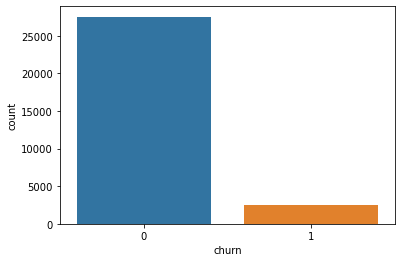

In [76]:
univariate(df['churn'], True)

count    29953.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


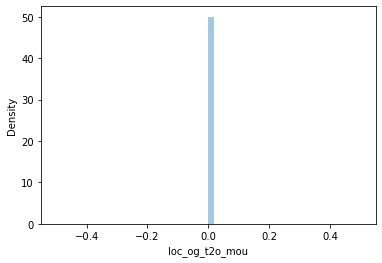

In [77]:
univariate(df['loc_og_t2o_mou'])

In [78]:
df['loc_og_t2o_mou'].sum()

0.0

###### Looks like the feature 'loc_og_t2o_mou' has all values zero. Let's check which variables are similar and has only values as 0.

In [79]:
num_vars, cat_vars = sep_num_cat(df)

zero_cols = [col for col in num_vars if df[col].sum()==0]
zero_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [80]:
df[zero_cols].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
count,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0,29953.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Let's drop these features as they have only zeros and not going to help in analysis or modelling.

In [81]:
df = df.drop(zero_cols, axis=1)

In [82]:
df.shape

(29953, 147)

In [83]:
num_vars, cat_vars = sep_num_cat(df)
print(num_vars)
print(cat_vars)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

count    29953.000000
mean       558.820058
std        460.868223
min      -2258.709000
25%        310.142000
50%        482.354000
75%        700.240000
max      27731.088000
Name: arpu_6, dtype: float64


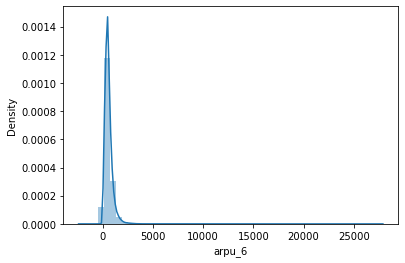

In [84]:
univariate(df['arpu_6'])

count    29953.000000
mean       376.397340
std        481.078628
min          0.000000
25%         80.690000
50%        222.560000
75%        487.910000
max       8362.360000
Name: offnet_mou_6, dtype: float64


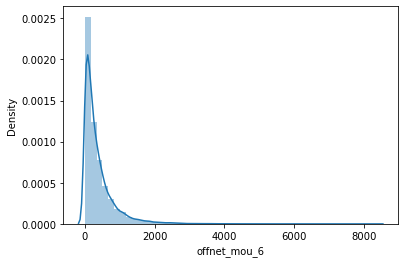

In [85]:
univariate(df['offnet_mou_6'])

##### There seems to be good number of outliers in the data as the curve is right skewed to high extent.

In [86]:
pd.crosstab(df.churn, df.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.918105,97.114275,97.360704
1,14.081895,2.885725,2.639296


##### We can see the churn distribution across one of the categorical features - night_pck_user_8. We can use this later to fill these features instead of one-hot encoding of -1,0 and 1.

### Cap the outliers for the numerical variables using Winzorisation method.

In [87]:
def cap_outliers_sigma(array, k=3):
    upper_limit = array.mean() + (k*array.std())
    lower_limit = array.mean() - (k*array.std())
    
    array[array < lower_limit] = lower_limit
    array[array > upper_limit] = upper_limit
    
    return array
    

In [88]:
df.backup3 = df.copy()

In [89]:
#df = df.backup3

In [90]:
df[num_vars] = df[num_vars].apply(cap_outliers_sigma, k=3, axis=0)

count    29953.000000
mean       361.314897
std        403.374165
min          0.000000
25%         80.690000
50%        222.560000
75%        487.910000
max       1819.633224
Name: offnet_mou_6, dtype: float64


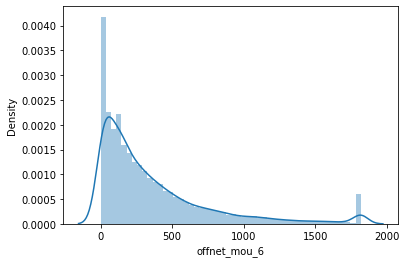

In [91]:
univariate(df['offnet_mou_6'])

### 4. Feature Engineering

##### Create diff variables to extract how the customers' behavior changed in month 8 (Action phase ) from that of months 6 and 7 (Good phase)

In [92]:
print(df.filter(regex='_8').columns)

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'night_pck_user_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_8'],
      dtype='object')


In [93]:
df['arpu_diff'] = df['arpu_8'] - ((df['arpu_6'] + df['arpu_7'])/2)

df['onnet_mou_diff'] = df['onnet_mou_8'] - ((df['onnet_mou_6'] + df['onnet_mou_7'])/2)

df['offnet_mou_diff'] = df['offnet_mou_8'] - ((df['offnet_mou_6'] + df['offnet_mou_7'])/2)

df['roam_ic_mou_diff'] = df['roam_ic_mou_8'] - ((df['roam_ic_mou_6'] + df['roam_ic_mou_7'])/2)

df['roam_og_mou_diff'] = df['roam_og_mou_8'] - ((df['roam_og_mou_6'] + df['roam_og_mou_7'])/2)

df['loc_og_mou_diff'] = df['loc_og_mou_8'] - ((df['loc_og_mou_6'] + df['loc_og_mou_7'])/2)

df['std_og_mou_diff'] = df['std_og_mou_8'] - ((df['std_og_mou_6'] + df['std_og_mou_7'])/2)

df['isd_og_mou_diff'] = df['isd_og_mou_8'] - ((df['isd_og_mou_6'] + df['isd_og_mou_7'])/2)

df['spl_og_mou_diff'] = df['spl_og_mou_8'] - ((df['spl_og_mou_6'] + df['spl_og_mou_7'])/2)

df['og_others_diff'] = df['og_others_8'] - ((df['og_others_6'] + df['og_others_7'])/2)

df['total_og_mou_diff'] = df['total_og_mou_8'] - ((df['total_og_mou_6'] + df['total_og_mou_7'])/2)

df['loc_ic_mou_diff'] = df['loc_ic_mou_8'] - ((df['loc_ic_mou_6'] + df['loc_ic_mou_7'])/2)

df['std_ic_mou_diff'] = df['std_ic_mou_8'] - ((df['std_ic_mou_6'] + df['std_ic_mou_7'])/2)

df['total_ic_mou_diff'] = df['total_ic_mou_8'] - ((df['total_ic_mou_6'] + df['total_ic_mou_7'])/2)

df['spl_ic_mou_diff'] = df['spl_ic_mou_8'] - ((df['spl_ic_mou_6'] + df['spl_ic_mou_7'])/2)

df['isd_ic_mou_diff'] = df['isd_ic_mou_8'] - ((df['isd_ic_mou_6'] + df['isd_ic_mou_7'])/2)

df['ic_others_diff'] = df['ic_others_8'] - ((df['ic_others_6'] + df['ic_others_7'])/2)

df['total_rech_amt_diff'] = df['total_rech_amt_8'] - ((df['total_rech_amt_6'] + df['total_rech_amt_7'])/2)

df['max_rech_amt_diff'] =  df['max_rech_amt_8'] - ((df['max_rech_amt_6'] + df['max_rech_amt_7'])/2)

df['total_rech_data_diff'] = df['total_rech_data_8'] - ((df['total_rech_data_6'] + df['total_rech_data_7'])/2)

df['max_rech_data_diff'] = df['max_rech_data_8'] - ((df['max_rech_data_6'] + df['max_rech_data_7'])/2)

df['av_rech_amt_data_diff'] = df['av_rech_amt_data_8'] - ((df['av_rech_amt_data_6'] + df['av_rech_amt_data_7'])/2)

df['vol_2g_mb_diff'] = df['vol_2g_mb_8'] - ((df['vol_2g_mb_6'] + df['vol_2g_mb_7'])/2)

df['vol_3g_mb_diff'] = df['vol_3g_mb_8'] - ((df['vol_3g_mb_6'] + df['vol_3g_mb_7'])/2)

In [94]:
df.shape

(29953, 171)

### 5. Data Preparation before Modelling 

In [95]:
#### Convert 'churn' back to numerical dtype
df['churn'] = pd.to_numeric(df['churn'], errors='raise')

In [96]:
df['churn'].dtype

dtype('int64')

In [97]:
num_vars, cat_vars = sep_num_cat(df)
print("\nNumerical :\n\n", num_vars)

print("\n\nCategorical :\n\n", cat_vars)


Numerical :

 ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_

In [98]:
df_backup4 = df.copy()

In [99]:
##df_backup4 = pd.concat([X,y], axis=1)
##df_backup4.shape

In [100]:
#df = df_backup4.copy()

In [101]:
y = df.pop("churn")
X = df
#X = df.drop("churn", axis = 1)
#y = df.churn
X.shape

(29953, 170)

In [102]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,197.385,214.816,213.803000,-95.132578,-82.141787,0.00,144.011575,133.424607,0.00,28.542998,...,27.51655,-7.237485,-0.933509,-55.000000,0.000000,0.0,0.0,0.0,-9.975,-7.555
7,1069.180,1349.850,2015.299135,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,...,-0.10500,23.295000,-0.325000,1234.134659,-26.085079,0.0,0.0,0.0,0.000,0.000
8,378.721,492.223,137.362000,413.690000,351.030000,35.08,94.660000,80.630000,136.48,0.000000,...,0.00000,0.000000,0.000000,-399.000000,-92.000000,2.0,-54.0,-19.5,-177.970,-363.535
21,514.453,597.753,637.760000,102.410000,132.110000,85.14,757.930000,896.680000,983.39,0.000000,...,0.00000,0.000000,0.000000,78.000000,0.000000,0.0,0.0,0.0,0.000,0.000
23,74.350,193.897,366.966000,48.960000,50.660000,33.58,85.410000,89.360000,205.89,0.000000,...,0.00000,-10.375000,10.385000,212.000000,89.500000,1.0,89.5,92.0,-0.230,710.375


##### Train-Test split of data

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [104]:
print(X_train.shape)
print(X_test.shape)

(20967, 170)
(8986, 170)


In [105]:
print(y_train.shape)
print(y_train.sum()/len(y_train))
print(y_test.shape)
print(y_test.sum()/len(y_test))

(20967,)
0.08122287404015835
(8986,)
0.08123748052526152


##### The proportion of churn in train and test data looks equal.

In [106]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

##### Let us check the average churn in the categorical variables.

In [107]:
train = pd.concat([X_train, y_train], axis=1)
npu_6 = train.groupby('night_pck_user_6').churn.mean()
npu_7 = train.groupby('night_pck_user_7').churn.mean()
npu_8 = train.groupby('night_pck_user_8').churn.mean()
fbu_6 = train.groupby('fb_user_6').churn.mean()
fbu_7 = train.groupby('fb_user_7').churn.mean()
fbu_8 = train.groupby('fb_user_8').churn.mean()

print(npu_6)
print(npu_7)
print(npu_8)

print(fbu_6)
print(fbu_7)
print(fbu_8)

night_pck_user_6
-1.0    0.099092
0.0     0.066369
1.0     0.095890
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.113790
0.0     0.056581
1.0     0.063433
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.141116
0.0     0.029101
1.0     0.025000
Name: churn, dtype: float64
fb_user_6
-1.0    0.099092
0.0     0.078522
1.0     0.066193
Name: churn, dtype: float64
fb_user_7
-1.0    0.113790
0.0     0.068108
1.0     0.055782
Name: churn, dtype: float64
fb_user_8
-1.0    0.141116
0.0     0.066667
1.0     0.024809
Name: churn, dtype: float64


##### Instead of converting these categorical variables by one-hot-encoding, we can replace the categories with the respective average churn.

In [108]:
mapping = {'night_pck_user_6' : {-1: npu_6[0], 0: npu_6[1], 1: npu_6[2]},
           'night_pck_user_7' : {-1: npu_7[0], 0: npu_7[1], 1: npu_7[2]},
           'night_pck_user_8' : {-1: npu_8[0], 0: npu_8[1], 1: npu_8[2]},
           'fb_user_6' : {-1: fbu_6[0], 0: fbu_6[1], 1: fbu_6[2]},
           'fb_user_7' : {-1: fbu_7[0], 0: fbu_7[1], 1: fbu_7[2]},
           'fb_user_8' : {-1: fbu_8[0], 0: fbu_8[1], 1: fbu_8[2]}
          }
                                   
X_train.replace(mapping, inplace=True)
X_test.replace(mapping, inplace=True)

In [109]:
num_vars, cat_vars = sep_num_cat(X_train)
print("\nNumerical :\n\n", num_vars)

print("\n\nCategorical :\n\n", cat_vars)


Numerical :

 ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_

In [110]:
num_vars, cat_vars = sep_num_cat(X_test)
print("\nNumerical :\n\n", num_vars)

print("\n\nCategorical :\n\n", cat_vars)


Numerical :

 ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_

#### Use PCA to reduce the dimensions for modelling

In [111]:
X_train.shape

(20967, 170)

In [112]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
70087,521.407000,452.594,-0.500,146.33,79.04,5.18,709.740000,686.84,0.000000,0.000000,...,0.000,-24.245000,0.000,-583.000000,-110.0,0.0,0.0,0.0,0.000,0.000
90560,928.353000,553.882,789.034,196.91,148.58,235.89,794.930000,448.36,827.610000,0.000000,...,0.250,-23.807596,9.290,315.000000,325.0,0.0,0.0,0.0,-17.195,37.865
58800,350.272000,390.187,373.309,15.48,77.23,36.78,76.030000,97.64,74.060000,0.000000,...,-0.515,-29.145000,-1.375,10.000000,0.0,-0.5,0.0,-7.0,267.665,277.110
24547,537.160000,335.809,527.819,101.73,34.09,41.38,245.980000,164.73,103.590000,0.000000,...,0.000,0.000000,0.000,-11.000000,39.0,0.0,0.0,0.0,0.000,0.000
50364,1941.424726,1555.525,1352.371,387.83,171.08,212.81,1819.633224,1783.18,1777.433249,245.848027,...,-0.075,0.000000,0.380,-653.052386,9.5,0.0,0.0,0.0,0.000,0.000


In [113]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [114]:
X_train_backup1 = X_train.copy()
X_test_backup1 = X_test.copy()

In [115]:
pca_pipeline = Pipeline([('std_scaler',StandardScaler()), ('pca', PCA(0.9))]) 
X_train_transformed = pca_pipeline.fit_transform(X_train)

In [116]:
X_train_transformed.shape

(20967, 53)

In [117]:
X_train_transformed

array([[ 1.15445678, -4.84741297, -3.74188659, ..., -0.22326818,
         0.13063845,  0.28374764],
       [ 2.46997168,  6.82311591,  1.07945398, ...,  0.5602961 ,
         0.15443784, -0.54147085],
       [-2.72619138,  3.11712913,  3.09679585, ..., -1.23447096,
        -1.20413411,  0.37231091],
       ...,
       [ 5.04019244, -2.91613926,  2.60404278, ...,  0.84841571,
         0.23333787,  0.05268804],
       [-2.40118939, -4.67151418, -2.63755453, ..., -0.41093332,
        -0.17478766, -0.04734589],
       [ 1.0551558 , -5.42808981,  5.37899842, ...,  0.13648988,
        -0.37112716,  0.49862265]])

In [118]:
X_test_transformed = pca_pipeline.transform(X_test)

In [119]:
X_test_transformed.shape

(8986, 53)

In [120]:
X_test_transformed

array([[ 6.08965573, 10.83869799, -0.53228001, ...,  0.28000432,
         0.18559866,  0.28178204],
       [ 7.19546129,  1.51887418,  1.08856456, ..., -1.20368402,
         0.57195538, -0.07471732],
       [ 0.38274443, -4.06053985, -2.24217009, ...,  0.30899485,
         0.50319003, -0.73057078],
       ...,
       [-4.05218494, -2.78477657, -0.04444634, ...,  0.8689242 ,
         1.14607907,  0.10943537],
       [ 1.55627875, -3.69491441, -3.66659216, ..., -1.40568224,
        -0.71261696,  1.01389956],
       [ 4.92102784, -1.13688968, -1.78683071, ..., -0.17559014,
         0.32638595, -0.1668486 ]])

##### We have managed to reduce the number of features from 170 to 53 using PCA. We are set for trying out different models.

### 6. Model Building 

### 6.1 Logistic Regression

In [315]:
from sklearn.linear_model import LogisticRegression

In [316]:
lr1 = LogisticRegression()

In [317]:
# Fit the model on training data
lr1 = lr1.fit(X_train_transformed, y_train)

In [318]:
# Predict on the train data
y_train_pred_lr1, y_train_pred_prob_lr1  = predict_and_proba(lr1, X_train_transformed)

In [319]:
# Results on Train Data
print_binary_classification_summary(y_train, y_train_pred_lr1)



Confusion Matrix :

 [[19062   202]
 [ 1069   634]]

TN : 19062

FP : 202

FN : 1069

TP : 634

ACCURACY :  0.9393809319406686

SENSITIVITY :  0.37228420434527304

PRECISION :  0.7583732057416268

FALSE POSITIVITY RATE :  0.010485880398671096

SPECIFICITY :  0.989514119601329


 Classification Report :

               precision    recall  f1-score   support

           0       0.95      0.99      0.97     19264
           1       0.76      0.37      0.50      1703

    accuracy                           0.94     20967
   macro avg       0.85      0.68      0.73     20967
weighted avg       0.93      0.94      0.93     20967



##### Accuracy looks high at 0.94, but sensitivity/recall for churn case is bad at 0.37

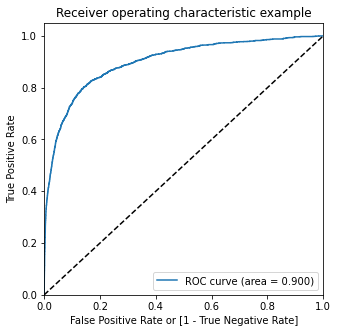


AUC SCORE = 0.900


In [321]:
### ROC curve and AUC score on train data
auc_score_lr1 = draw_roc(y_train, y_train_pred_prob_lr1[:,1])

#### Sensitivity looks bad. This should be because of high class imbalance in the train data. Let us try with class_weight option

In [324]:
y_train.value_counts() / len(y_train)

0    0.918777
1    0.081223
Name: churn, dtype: float64

In [325]:
lr2 = LogisticRegression(class_weight='balanced')
# or we can try below as well.
#lr2 = LogisticRegression(class_weight={0:0.1, 1:0.9})

In [326]:
# Fit model on train data
lr2 = lr2.fit(X_train_transformed, y_train)

In [327]:
# Predict on Train data
y_train_pred_lr2, y_train_pred_prob_lr2  = predict_and_proba(lr2, X_train_transformed)

In [328]:
# Results on train data
print_binary_classification_summary(y_train, y_train_pred_lr2)



Confusion Matrix :

 [[16226  3038]
 [  301  1402]]

TN : 16226

FP : 3038

FN : 301

TP : 1402

ACCURACY :  0.8407497496065245

SENSITIVITY :  0.8232530827950675

PRECISION :  0.31576576576576576

FALSE POSITIVITY RATE :  0.15770348837209303

SPECIFICITY :  0.842296511627907


 Classification Report :

               precision    recall  f1-score   support

           0       0.98      0.84      0.91     19264
           1       0.32      0.82      0.46      1703

    accuracy                           0.84     20967
   macro avg       0.65      0.83      0.68     20967
weighted avg       0.93      0.84      0.87     20967



##### With class_weight='balanced' option, the model is able to achieve good 0.82 sensitivity with train data. Good !

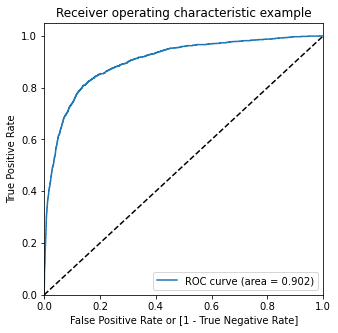


AUC SCORE = 0.902


In [329]:
### ROC and AUC score on train data
draw_roc(y_train, y_train_pred_prob_lr2[:,1])

In [332]:
### Let us maintain a dictionary of AUCs to compare after trying various models.
auc_dict = {}

#### Experimentation
##### Instead of class_weight='balanced', we can try giving explicit weights as below. The results were found to be almost same.

In [9]:
#lr3 = LogisticRegression(class_weight={0:0.1, 1:0.9})

In [8]:
#lr3 = lr3.fit(X_train_transformed, y_train)

In [ ]:
#y_train_pred_lr3, y_train_pred_prob_lr3  = predict_and_proba(lr3, X_train_transformed)

In [ ]:
#print_binary_classification_summary(y_train, y_train_pred_lr3)

In [ ]:
#auc_score_lr3 = draw_roc(y_train, y_train_pred_prob_lr3[:,1])

In [ ]:
#y_test_pred_lr3, y_test_pred_prob_lr3  = predict_and_proba(lr3, X_test_transformed)

In [ ]:
#print_binary_classification_summary(y_test, y_test_pred_lr3)


#### Logistic Regression with hyper-parameter tuning

In [335]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

lr4 = LogisticRegression(class_weight='balanced')

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l2', 'l1', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Use Multi scorer
scoring_measures = {'Precision': 'precision', 'Recall': 'recall', 'AUC' : 'roc_auc'}
refit = 'AUC'

# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# Refit and give the best model based on f1 score. 
grid_search_lr4 = GridSearchCV(estimator=lr4, param_grid=grid, cv=folds, scoring=scoring_measures, refit=refit, n_jobs=-1, verbose=1)

grid_result_lr4 = grid_search_lr4.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   28.3s finished


In [336]:
lr_grd_best_score = grid_result_summary(grid_result_lr4, scoring_measures, refit)

mean_test_AUC

Best hyperparameters:  {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}

Best Score : 0.89697
    mean_test_Precision  mean_test_Recall  mean_test_AUC
43             0.311906          0.813861       0.896971


In [337]:
## Get the best fit model from the grid search.

lr4 = grid_result_lr4.best_estimator_
lr4

LogisticRegression(class_weight='balanced', solver='sag')

In [338]:
## Predict on Train Set
y_train_pred_lr4, y_train_pred_prob_lr4  = predict_and_proba(lr4, X_train_transformed)

In [339]:
## Results on train set
print_binary_classification_summary(y_train, y_train_pred_lr4)



Confusion Matrix :

 [[16194  3070]
 [  303  1400]]

TN : 16194

FP : 3070

FN : 303

TP : 1400

ACCURACY :  0.8391281537654409

SENSITIVITY :  0.8220786846741045

PRECISION :  0.3131991051454139

FALSE POSITIVITY RATE :  0.15936461794019935

SPECIFICITY :  0.8406353820598007


 Classification Report :

               precision    recall  f1-score   support

           0       0.98      0.84      0.91     19264
           1       0.31      0.82      0.45      1703

    accuracy                           0.84     20967
   macro avg       0.65      0.83      0.68     20967
weighted avg       0.93      0.84      0.87     20967



##### Looks very similar to the previous LR model with sensitivity 0.82 and accuracy 0.84 on train data

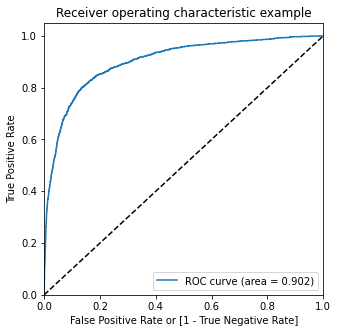


AUC SCORE = 0.902


0.902124579108979

In [340]:
### ROC curve and AUC on Train data
draw_roc(y_train, y_train_pred_prob_lr4[:,1])

In [344]:
#### Store the cross-validation mean test AUC in auc dictionary to compare later
auc_dict['Hyper_tuned_LR_lr4'] = "{:.3f}".format(lr_grd_best_score)
print(auc_dict)

{'Hyper_tuned_LR_lr4': '0.897'}


### 6.2 Random Forest

In [345]:
from sklearn.ensemble import RandomForestClassifier

In [346]:
rf1 = RandomForestClassifier(class_weight={0:0.1, 1:0.9})

### Fit on train data
rf1.fit(X_train_transformed, y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9})

In [347]:
### Predict on train set
y_pred_rf1 = rf1.predict(X_train_transformed)

In [348]:
### Results on train set
print_binary_classification_summary(y_train, y_pred_rf1)



Confusion Matrix :

 [[19264     0]
 [    1  1702]]

TN : 19264

FP : 0

FN : 1

TP : 1702

ACCURACY :  0.999952306004674

SENSITIVITY :  0.9994128009395185

PRECISION :  1.0

FALSE POSITIVITY RATE :  0.0

SPECIFICITY :  1.0


 Classification Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     20967
   macro avg       1.00      1.00      1.00     20967
weighted avg       1.00      1.00      1.00     20967



#### All seems perfect. A case of extreme overfitting on train data !

#### Random Forests with hyper-parameter tuning

Let's first use RandomizedSearchCV to get the initial optimal values of hyper-params to later fine tune.

In [351]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

param_grid = {
    'max_depth': [int(x) for x in np.linspace(5,100,20)],
    'min_samples_leaf': [int(x) for x in np.linspace(100,400,4)] ,
    'min_samples_split': [int(x) for x in np.linspace(100,400,4)],
    'n_estimators': [int(x) for x in np.linspace(100,500,5)], 
    'max_features': ['auto', 'sqrt']
}

print(param_grid)

rf_rs = RandomForestClassifier(class_weight='balanced')

scoring_rf_rs = {'Precision':'precision', 'Recall':'recall', 'AUC':'roc_auc'}
refit = 'AUC'

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

random_search_rf =  RandomizedSearchCV(estimator=rf_rs, param_distributions=param_grid, scoring=scoring_rf_rs, 
                                       cv=folds, refit=refit, n_jobs=-1, verbose=1, n_iter=100)

random_results_rf = random_search_rf.fit(X_train_transformed, y_train)



{'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], 'min_samples_leaf': [100, 200, 300, 400], 'min_samples_split': [100, 200, 300, 400], 'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt']}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 16.0min finished


In [353]:
rf_rand_best_score1 = grid_result_summary(random_results_rf, scoring_rf_rs, refit)

mean_test_AUC

Best hyperparameters:  {'n_estimators': 500, 'min_samples_split': 100, 'min_samples_leaf': 100, 'max_features': 'auto', 'max_depth': 80}

Best Score : 0.89688
    mean_test_Precision  mean_test_Recall  mean_test_AUC
76             0.390131          0.723424       0.896883


##### Based on the best hyperparam values found by RandomizedSearchCV, let us use GridSearchCV to further narrow down the optimal hyper-param values

In [354]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [70, 80, 90],
    'min_samples_leaf': [80, 100, 120],
    'min_samples_split': [80, 100, 120],
    'n_estimators': [400, 500, 600] 
}
# Create a base model
rf2 = RandomForestClassifier(class_weight="balanced", max_features='auto')

# Use Multi scorer
scoring_measures = {'Precision': 'precision', 'Recall': 'recall', 'AUC' : 'roc_auc'}
refit = 'AUC'

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# Refit and give the best model based on f1 score. 
grid_search_rf2 = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=folds, 
                               scoring=scoring_measures, refit=refit, n_jobs=-1, verbose=1)

# Instantiate the grid search model
#grid_search2 = GridSearchCV(estimator = rf, param_grid = param_grid, 
 #                        cv = 3, refit='F1', return_train_score = True, scoring=scoring, n_jobs = -1,verbose = 1)
    
grid_results_rf2 = grid_search_rf2.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 25.2min finished


In [355]:
rf_grd_best_score1 = grid_result_summary(grid_results_rf2, scoring_measures, refit)

mean_test_AUC

Best hyperparameters:  {'max_depth': 80, 'min_samples_leaf': 80, 'min_samples_split': 100, 'n_estimators': 500}

Best Score : 0.89762
    mean_test_Precision  mean_test_Recall  mean_test_AUC
31              0.39953          0.712872       0.897617


##### We see that the optimum min_samples_leaf value is a border value 80 in the range [80, 100, 120] we input to gridsearch. So let us try to narrow down this parameter further using gridsearch

In [356]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': [60, 70, 80, 90, 100],
}
# Create a base model
rf3 = RandomForestClassifier(class_weight="balanced", max_features='sqrt', 
                             max_depth = 80, min_samples_split = 100, n_estimators = 500)

# Use Multi scorer
scoring_measures = {'Precision': 'precision', 'Recall': 'recall', 'AUC' : 'roc_auc'}
refit = 'AUC'

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# Refit and give the best model based on f1 score. 
grid_search_rf3 = GridSearchCV(estimator=rf3, param_grid=param_grid, cv=folds, 
                               scoring=scoring_measures, refit=refit, n_jobs=-1, verbose=1)

# Instantiate the grid search model
grid_results_rf3 = grid_search_rf3.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.0min finished


In [357]:
rf_grd_best_score2 = grid_result_summary(grid_results_rf3, scoring_measures, refit)

mean_test_AUC

Best hyperparameters:  {'min_samples_leaf': 60}

Best Score : 0.89793
   mean_test_Precision  mean_test_Recall  mean_test_AUC
0              0.40952           0.69996       0.897934


##### We are not able to significantly improve the AUC score, instead Recall has degraded. So, let's not narrow down further.

In [358]:
# Get the best fit model
rf2 = grid_results_rf3.best_estimator_

In [359]:
# Predict on train set
y_train_pred_rf2, y_train_pred_prob_rf2  = predict_and_proba(rf2, X_train_transformed)

In [360]:
# Train set results
print_binary_classification_summary(y_train, y_train_pred_rf2)



Confusion Matrix :

 [[17610  1654]
 [  299  1404]]

TN : 17610

FP : 1654

FN : 299

TP : 1404

ACCURACY :  0.9068536271283445

SENSITIVITY :  0.8244274809160306

PRECISION :  0.4591236102027469

FALSE POSITIVITY RATE :  0.08585963455149502

SPECIFICITY :  0.914140365448505


 Classification Report :

               precision    recall  f1-score   support

           0       0.98      0.91      0.95     19264
           1       0.46      0.82      0.59      1703

    accuracy                           0.91     20967
   macro avg       0.72      0.87      0.77     20967
weighted avg       0.94      0.91      0.92     20967



##### We see accuracy of 0.91 and sensitivity of 0.82 on train data

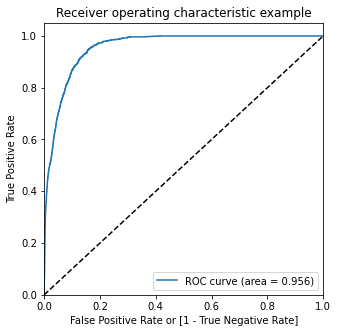


AUC SCORE = 0.956


0.9563934589731234

In [361]:
draw_roc(y_train, y_train_pred_prob_rf2[:,1])

In [363]:
## Store the cross-validation mean test AUC in auc dictionary to compare later
auc_dict['hyper_tuned_RF_rf2'] = "{:.3f}".format(rf_grd_best_score2)
print(auc_dict)

{'Hyper_tuned_LR_lr4': '0.897', 'hyper_tuned_RF_rf2': '0.898'}


### 6.3 SVM 

In [364]:
from sklearn.svm import SVC

##### SVM does not emit probabilities natively. So we need to use probability =True if we want  to draw ROC curve and for AUC.
https://scikit-learn.org/dev/modules/svm.html#scores-and-probabilities
When the constructor option probability is set to True, class membership probability estimates (from the methods predict_proba and predict_log_proba) are enabled. In the binary case, the probabilities are calibrated using Platt scaling 9: logistic regression on the SVM’s scores, fit by an additional cross-validation on the training data.

In [447]:
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced')

svm_model.fit(X_train_transformed, y_train)

SVC(class_weight='balanced', probability=True)

In [367]:
y_train_pred_svm, y_train_pred_prob_svm  = predict_and_proba(svm_model, X_train_transformed)

In [368]:
# Train data results
print_binary_classification_summary(y_train, y_train_pred_svm)



Confusion Matrix :

 [[17423  1841]
 [  131  1572]]

TN : 17423

FP : 1841

FN : 131

TP : 1572

ACCURACY :  0.9059474412171508

SENSITIVITY :  0.9230769230769231

PRECISION :  0.46059185467330793

FALSE POSITIVITY RATE :  0.09556686046511628

SPECIFICITY :  0.9044331395348837


 Classification Report :

               precision    recall  f1-score   support

           0       0.99      0.90      0.95     19264
           1       0.46      0.92      0.61      1703

    accuracy                           0.91     20967
   macro avg       0.73      0.91      0.78     20967
weighted avg       0.95      0.91      0.92     20967



##### Plain SVM model has given high accuracy and sensitivity >0.90 as seen above.

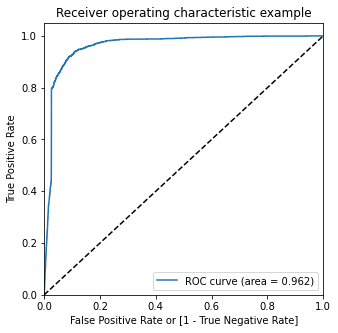


AUC SCORE = 0.962


0.9619953514220557

In [370]:
draw_roc(y_train, y_train_pred_prob_svm[:,1])

In [373]:
print(svm_model.get_params(deep=True))

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


#### SVM Hyper-Parameter tuning

In [374]:

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state=100)

hyper_params = [{'gamma': [1e-2, 1e-3, 1e-4, 'scale', 'auto'],
                 'C': [1, 10, 100, 1000]}]

svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True)

# Use Multi scorer
scoring_measures = {'Precision': 'precision', 'Recall': 'recall', 'AUC' : 'roc_auc'}
refit = 'AUC'

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# Refit and give the best model based on f1 score. 
grid_search_svm = GridSearchCV(estimator=svm_model, 
                               param_grid=hyper_params, 
                               scoring=scoring_measures,
                               cv=folds, refit=refit, 
                               n_jobs=-1, verbose=1)

  
grid_results_svm = grid_search_svm.fit(X_train_transformed, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 28.5min finished


In [375]:
svm_grd_best_score = grid_result_summary(grid_results_svm, scoring_measures, refit)

mean_test_AUC

Best hyperparameters:  {'C': 1, 'gamma': 0.001}

Best Score : 0.90283
   mean_test_Precision  mean_test_Recall  mean_test_AUC
1             0.344207          0.794485        0.90283


##### Let us narrow down 'C' further as the optimum value lies in the border of the range we input to grid search

In [376]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state=100)

hyper_params = [{'C': [0.5, 0.80, 1]}]

svm_model = SVC(kernel='rbf', class_weight='balanced', gamma=0.001, probability=True)

# Use Multi scorer
scoring_measures = {'Precision': 'precision', 'Recall': 'recall', 'AUC' : 'roc_auc'}
refit = 'AUC'

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# Refit and give the best model based on f1 score. 
grid_search_svm2 = GridSearchCV(estimator=svm_model, 
                               param_grid=hyper_params, 
                               scoring=scoring_measures,
                               cv=folds, refit=refit, 
                               n_jobs=-1, verbose=1)

  
grid_results_svm2 = grid_search_svm2.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  3.5min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.9min finished


In [377]:
svm_grd_best_score2 = grid_result_summary(grid_results_svm2, scoring_measures, refit)

mean_test_AUC

Best hyperparameters:  {'C': 1}

Best Score : 0.90283
   mean_test_Precision  mean_test_Recall  mean_test_AUC
2             0.344207          0.794485        0.90283


In [378]:
# Get the best fit model from randomsearch results
svm2 = grid_results_svm2.best_estimator_

In [379]:
y_train_pred_svm2, y_train_pred_prob_svm2  = predict_and_proba(svm2, X_train_transformed)

In [380]:
print_binary_classification_summary(y_train, y_train_pred_svm2)



Confusion Matrix :

 [[16724  2540]
 [  291  1412]]

TN : 16724

FP : 2540

FN : 291

TP : 1412

ACCURACY :  0.8649782992321267

SENSITIVITY :  0.8291250733998825

PRECISION :  0.35728744939271256

FALSE POSITIVITY RATE :  0.13185215946843853

SPECIFICITY :  0.8681478405315615


 Classification Report :

               precision    recall  f1-score   support

           0       0.98      0.87      0.92     19264
           1       0.36      0.83      0.50      1703

    accuracy                           0.86     20967
   macro avg       0.67      0.85      0.71     20967
weighted avg       0.93      0.86      0.89     20967



##### We get good accuracy of 86% and sensitivity of 83% on train data.

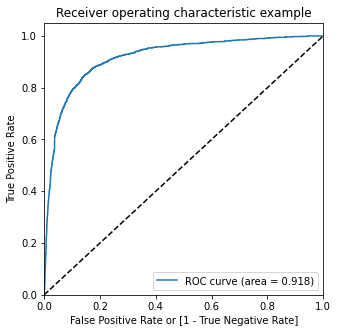


AUC SCORE = 0.918


0.918436422777471

In [381]:
draw_roc(y_train, y_train_pred_prob_svm2[:,1])

In [382]:
#### Store the best AUC score from grid search to AUC dictionary to compare models later
auc_dict['hyper_tuned_svm2'] = "{:.3f}".format(svm_grd_best_score2)
print(auc_dict)

{'Hyper_tuned_LR_lr4': '0.897', 'hyper_tuned_RF_rf2': '0.898', 'hyper_tuned_svm2': '0.903'}


### 6.4 XGBoost

In [385]:
from xgboost import XGBClassifier

In [386]:
#scale_pos_weight = total_negative_examples / total_positive_examples
y_train.value_counts()[0] / y_train.value_counts()[1]

11.311802701115678

In [387]:
xgbm = XGBClassifier(scale_pos_weight=11, eval_metric='logloss')

xgbm.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=11, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [388]:
y_train_pred_xgb1, y_train_pred_prob_xgb1  = predict_and_proba(xgbm, X_train_transformed)

In [389]:
print_binary_classification_summary(y_train, y_train_pred_xgb1)



Confusion Matrix :

 [[19128   136]
 [    0  1703]]

TN : 19128

FP : 136

FN : 0

TP : 1703

ACCURACY :  0.9935136166356656

SENSITIVITY :  1.0

PRECISION :  0.9260467645459489

FALSE POSITIVITY RATE :  0.0070598006644518275

SPECIFICITY :  0.9929401993355482


 Classification Report :

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     19264
           1       0.93      1.00      0.96      1703

    accuracy                           0.99     20967
   macro avg       0.96      1.00      0.98     20967
weighted avg       0.99      0.99      0.99     20967



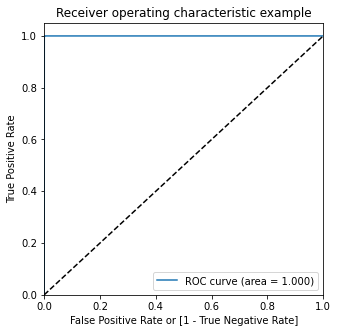


AUC SCORE = 1.000


0.9999854297575316

In [391]:
draw_roc(y_train, y_train_pred_prob_xgb1[:,1])

##### Simple XGBoost looks a over-fit. 

#### XGBoost hyper-parameter tuning

In [392]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# creating a KFold object 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state=100)


# specify range of hyperparameters
param_grid = {
             'max_depth': [2,3,5,7,9,11],
             'learning_rate': [0.025, 0.05, 0.075, 0.10, 0.25, 0.5, 0.75, 0.1, 0.2, 0.3, 0.4],
             'n_estimators':  [int(x) for x in np.linspace(100,1000,10)],
             'subsample': [float(x) for x in np.linspace(0.1, 1, 10)]
             }          

print(param_grid)

# Use Multi scorer
scoring_measures = {'Precision': 'precision', 'Recall': 'recall', 'AUC' : 'roc_auc'}
refit = 'AUC'

# specify model


xgb_model = XGBClassifier(random_state=123, tree_method='gpu_hist', scale_pos_weight=11, eval_metric='logloss')


random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, scoring=scoring_measures, 
                                       cv=folds, refit=refit, n_jobs=-1, verbose=1, n_iter=100)

# fit the model

random_results_xgb = random_search_xgb.fit(X_train_transformed, y_train)


{'max_depth': [2, 3, 5, 7, 9, 11], 'learning_rate': [0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 0.1, 0.2, 0.3, 0.4], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'subsample': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 47.7min finished


In [393]:
xgb_rand_best_score = grid_result_summary(random_results_xgb, scoring_measures, refit)

mean_test_AUC

Best hyperparameters:  {'subsample': 0.9, 'n_estimators': 600, 'max_depth': 9, 'learning_rate': 0.025}

Best Score : 0.90002
    mean_test_Precision  mean_test_Recall  mean_test_AUC
33             0.649179          0.467437       0.900024


##### Let us tune hyper-params further using GridSearchCV based on the results of RandomizedSearchCV

In [395]:
# creating a KFold object 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state=100)


# specify range of hyperparameters

### Due to computational constraints, we omit gamma and n_estimators from gridsearch.
param_grid = {
             'max_depth': [7, 9, 11],
             'learning_rate': [0.01, 0.025, 0.05],
             'subsample': [0.7, 0.8, 0.9],
             'min_child_weight': [0.10, 0.20, 0.30]
             #'gamma': np.arange(0.0,40.0,0.005),
             }      

#print(param_grid)

# Use Multi scorer
scoring_measures = {'Precision': 'precision', 'Recall': 'recall', 'AUC' : 'roc_auc'}
refit = 'AUC'

# specify model

# If you want GPU
xgb_model = XGBClassifier(random_state=123, 
                          scale_pos_weight=11, 
                          tree_method='gpu_hist', 
                          eval_metric='logloss', 
                          n_estimators=600) 


# set up GridSearchCV()
grid_search_xgb = GridSearchCV(estimator = xgb_model, 
                       param_grid = param_grid, 
                       scoring = scoring_measures, 
                       refit=refit,
                       cv = folds, 
                       verbose = 1,
                       n_jobs=-1)    

# fit the model
grid_results_xgb = grid_search_xgb.fit(X_train_transformed, y_train) 




Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 79.2min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 158.6min finished


In [396]:
xgb_grd_best_score = grid_result_summary(grid_results_xgb, scoring_measures, refit)

mean_test_AUC

Best hyperparameters:  {'learning_rate': 0.025, 'max_depth': 9, 'min_child_weight': 0.1, 'subsample': 0.8}

Best Score : 0.90169
    mean_test_Precision  mean_test_Recall  mean_test_AUC
37             0.662317          0.436308       0.901691


In [397]:
# Get the best fit model from randomsearch results
xgb2 = grid_results_xgb.best_estimator_

In [398]:
y_train_pred_xgb2, y_train_pred_prob_xgb2  = predict_and_proba(xgb2, X_train_transformed)

In [399]:
print_binary_classification_summary(y_train, y_train_pred_xgb2)



Confusion Matrix :

 [[19264     0]
 [    0  1703]]

TN : 19264

FP : 0

FN : 0

TP : 1703

ACCURACY :  1.0

SENSITIVITY :  1.0

PRECISION :  1.0

FALSE POSITIVITY RATE :  0.0

SPECIFICITY :  1.0


 Classification Report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     20967
   macro avg       1.00      1.00      1.00     20967
weighted avg       1.00      1.00      1.00     20967



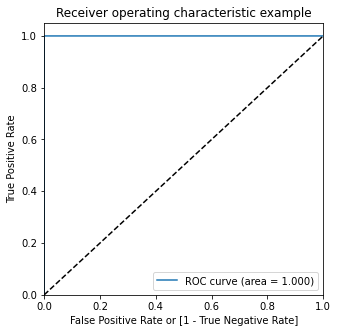


AUC SCORE = 1.000


1.0

In [400]:
draw_roc(y_train, y_train_pred_prob_xgb2[:,1])

##### XGBoost seems to have overfit the training data even after some hyper-param tuning.

In [401]:
#### Store the best AUC score from grid search to AUC dictionary to compare models.
auc_dict['hyper_tuned_xgb2'] = "{:.3f}".format(xgb_grd_best_score)

{'Hyper_tuned_LR_lr4': '0.897', 'hyper_tuned_RF_rf2': '0.898', 'hyper_tuned_svm2': '0.903', 'hyper_tuned_xgb2': '0.902'}


In [418]:
print(auc_dict)

{'Hyper_tuned_LR_lr4': '0.897', 'hyper_tuned_RF_rf2': '0.898', 'hyper_tuned_svm2': '0.903', 'hyper_tuned_xgb2': '0.902'}


In [533]:
joblib.dump(lr4, "lr_model.pkl")
joblib.dump(rf2, "rf_model.pkl")
joblib.dump(svm2, "svm_model.pkl")
joblib.dump(xgb2, "xgb_model.pkl")


['lr_model.pkl']

['rf_model.pkl']

['svm_model.pkl']

['xgb_model.pkl']

### 7. Model selection and Prediction On Test Data
###### Let us select the model which had the highest ROC_AUC in cross-validation - SVM model with tuned hyper-parameters.

In [468]:
final_model = svm2

In [469]:
## Predict on train data
y_train_pred_final, y_train_pred_prob_final  = predict_and_proba(final_model, X_train_transformed)

In [470]:
print_binary_classification_summary(y_train, y_train_pred_final)



Confusion Matrix :

 [[16724  2540]
 [  291  1412]]

TN : 16724

FP : 2540

FN : 291

TP : 1412

ACCURACY :  0.8649782992321267

SENSITIVITY :  0.8291250733998825

PRECISION :  0.35728744939271256

FALSE POSITIVITY RATE :  0.13185215946843853

SPECIFICITY :  0.8681478405315615


 Classification Report :

               precision    recall  f1-score   support

           0       0.98      0.87      0.92     19264
           1       0.36      0.83      0.50      1703

    accuracy                           0.86     20967
   macro avg       0.67      0.85      0.71     20967
weighted avg       0.93      0.86      0.89     20967



##### 86% accuracy and 83% sensitivity on train data

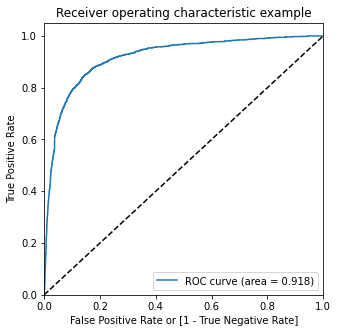


AUC SCORE = 0.918


0.918436422777471

In [472]:
draw_roc(y_train, y_train_pred_prob_final[:,1])

In [473]:
## Predict on test data
y_test_pred_final, y_test_pred_prob_final  = predict_and_proba(final_model, X_test_transformed)

In [474]:
print_binary_classification_summary(y_test, y_test_pred_final)



Confusion Matrix :

 [[7160 1096]
 [ 131  599]]

TN : 7160

FP : 1096

FN : 131

TP : 599

ACCURACY :  0.863454262185622

SENSITIVITY :  0.8205479452054795

PRECISION :  0.35339233038348083

FALSE POSITIVITY RATE :  0.13275193798449614

SPECIFICITY :  0.8672480620155039


 Classification Report :

               precision    recall  f1-score   support

           0       0.98      0.87      0.92      8256
           1       0.35      0.82      0.49       730

    accuracy                           0.86      8986
   macro avg       0.67      0.84      0.71      8986
weighted avg       0.93      0.86      0.89      8986



##### 86% accuracy and 82% sensitivity on test data

### 8. Conclusion

#### The best model selected gives

#### 86% accuracy and 83% sensitivity on train data

#### 86% accuracy and 82% sensitivity on test data

#### which looks very consistent between train data and test data and proves that there is a very good Bias Vs Variance balance


Save the final model, X_train, X_test, y_train and y_test data

In [526]:
import joblib
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

In [547]:
joblib.dump(X_train_transformed, "X_train_transformed.pkl")
joblib.dump(X_test_transformed, "X_test_transformed.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")

['X_train_transformed.pkl']

['X_test_transformed.pkl']

['y_train.pkl']

['y_test.pkl']

In [6]:
import joblib
final_model_loaded = joblib.load("final_model.pkl")

In [7]:
print(final_model_loaded.get_params(deep=True))

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [8]:
X_test_transformed_loaded = joblib.load("X_test_transformed.pkl")
X_test_transformed_loaded

array([[ 6.08965573, 10.83869799, -0.53228001, ...,  0.28000432,
         0.18559866,  0.28178204],
       [ 7.19546129,  1.51887418,  1.08856456, ..., -1.20368402,
         0.57195538, -0.07471732],
       [ 0.38274443, -4.06053985, -2.24217009, ...,  0.30899485,
         0.50319003, -0.73057078],
       ...,
       [-4.05218494, -2.78477657, -0.04444634, ...,  0.8689242 ,
         1.14607907,  0.10943537],
       [ 1.55627875, -3.69491441, -3.66659216, ..., -1.40568224,
        -0.71261696,  1.01389956],
       [ 4.92102784, -1.13688968, -1.78683071, ..., -0.17559014,
         0.32638595, -0.1668486 ]])

In [9]:
y_test_loaded = joblib.load("y_test.pkl")
y_test_loaded

38736    0
14328    0
54761    1
43872    0
22105    0
        ..
6813     0
15915    0
8789     0
23384    1
61092    0
Name: churn, Length: 8986, dtype: int64

In [11]:
## Predict on test data
y_test_pred_trial, y_test_pred_prob_trial  = predict_and_proba(final_model_loaded, X_test_transformed_loaded)

In [12]:
print_binary_classification_summary(y_test_loaded, y_test_pred_trial)



Confusion Matrix :

 [[7160 1096]
 [ 131  599]]

TN : 7160

FP : 1096

FN : 131

TP : 599

ACCURACY :  0.863454262185622

SENSITIVITY :  0.8205479452054795

PRECISION :  0.35339233038348083

FALSE POSITIVITY RATE :  0.13275193798449614

SPECIFICITY :  0.8672480620155039


 Classification Report :

               precision    recall  f1-score   support

           0       0.98      0.87      0.92      8256
           1       0.35      0.82      0.49       730

    accuracy                           0.86      8986
   macro avg       0.67      0.84      0.71      8986
weighted avg       0.93      0.86      0.89      8986



##### 9. Notes on some extra learning

Let's analyze the churn probabilities for each customer by the finally selected SVM model

In [475]:
y_train_pred_df = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_prob_final[:,1]})
y_train_pred_df['Cust_Id'] = y_train.index
y_train_pred_df

,churn,churn_prob,Cust_Id
0,1,0.532756,70087
1,0,0.004241,90560
2,0,0.005804,58800
3,0,0.054822,24547
4,0,0.176804,50364
...,...,...,...
20962,0,0.001669,69580
20963,0,0.035361,67901
20964,0,0.014211,80741
20965,0,0.227500,50324


In [476]:
# Let's create columns with different probability cutoffs 
numbers =[float(x)/10 for x in range(10) ]
for i in numbers:
   y_train_pred_df[i] =  y_train_pred_df.churn_prob.map(lambda x: 1 if x > i else 0)

y_train_pred_df

,churn,churn_prob,Cust_Id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.532756,70087,1,1,1,1,1,1,0,0,0,0
1,0,0.004241,90560,1,0,0,0,0,0,0,0,0,0
2,0,0.005804,58800,1,0,0,0,0,0,0,0,0,0
3,0,0.054822,24547,1,0,0,0,0,0,0,0,0,0
4,0,0.176804,50364,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20962,0,0.001669,69580,1,0,0,0,0,0,0,0,0,0
20963,0,0.035361,67901,1,0,0,0,0,0,0,0,0,0
20964,0,0.014211,80741,1,0,0,0,0,0,0,0,0,0
20965,0,0.227500,50324,1,1,1,0,0,0,0,0,0,0


In [477]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.churn, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081223  1.000000  0.000000
0.1   0.1  0.866218  0.828538  0.869549
0.2   0.2  0.911861  0.732237  0.927741
0.3   0.3  0.928030  0.654727  0.952191
0.4   0.4  0.933515  0.517910  0.970255
0.5   0.5  0.934230  0.361127  0.984894
0.6   0.6  0.928841  0.203758  0.992940
0.7   0.7  0.922974  0.088080  0.996782
0.8   0.8  0.919731  0.027011  0.998650
0.9   0.9  0.918968  0.004110  0.999844


In the above table, we see probability threshold (cutoff) of 0.1 corresponds to 87% accuracy and 83% sensitivity. 
These values correspond to the accuracy and sensitivity given by the same model by default ( when we did not select any cutoff ourselves). So this shows SVM does not predict based on probability and therefore by a default probability threshold of 0.5.

In fact SVM does not give out probabilities natively. We are trying to get the probabilities by triggering calibration by passing "probability = True" while initializing the model.
https://scikit-learn.org/dev/modules/svm.html#scores-and-probabilities


We can also use another method for the same - "CalibratedClassifierCV" 

https://mmuratarat.github.io/2019-10-12/probabilistic-output-of-svm

https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/


Let us try this method on SVM model which we initialize with the same hyper-param combination as the final model we selected.

In [516]:
from sklearn.calibration import CalibratedClassifierCV

svm = SVC(kernel='rbf', class_weight='balanced', gamma=0.001, C=1)

#svm = SVC(kernel='rbf', class_weight='balanced')
#svm = SVC(kernel='rbf', class_weight='balanced', probability=True)

clf = CalibratedClassifierCV(svm) 

#clf = CalibratedClassifierCV(svm2) 

clf.fit(X_train_transformed, y_train)

y_prob, y_proba = predict_and_proba(clf, X_train_transformed)

CalibratedClassifierCV(base_estimator=SVC(C=1, class_weight='balanced',
                                          gamma=0.001))

In [517]:
#svm4 = SVC(kernel='rbf', class_weight='balanced')
#svm4.fit(X_train_transformed, y_train)

#svm4_pred = svm4.predict(X_train_transformed)

#svm4_pred_proba = svm4.decision_function(X_train_transformed)

In [518]:
print_binary_classification_summary(y_train, y_prob)
#print_binary_classification_summary(y_train, svm4_pred)



Confusion Matrix :

 [[18954   310]
 [ 1057   646]]

TN : 18954

FP : 310

FN : 1057

TP : 646

ACCURACY :  0.9348023083893737

SENSITIVITY :  0.3793305930710511

PRECISION :  0.6757322175732218

FALSE POSITIVITY RATE :  0.0160921926910299

SPECIFICITY :  0.9839078073089701


 Classification Report :

               precision    recall  f1-score   support

           0       0.95      0.98      0.97     19264
           1       0.68      0.38      0.49      1703

    accuracy                           0.93     20967
   macro avg       0.81      0.68      0.73     20967
weighted avg       0.93      0.93      0.93     20967



##### Note the accuracy 93.4% and sensitivity 37.9%

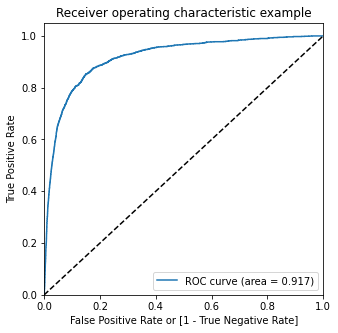


AUC SCORE = 0.917


0.917236054266167

In [519]:
draw_roc(y_train, y_proba[:,1])
#draw_roc(y_train, svm4_pred_proba)

In [520]:
y_train_pred_df1 = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_proba[:,1]})

y_train_pred_df['Cust_Id'] = y_train.index
y_train_pred_df1

#y_train_pred_df2 = pd.DataFrame({'churn':y_train.values, 'churn_prob':svm4_pred_proba})

,churn,churn_prob
0,1,0.527263
1,0,0.003534
2,0,0.005577
3,0,0.053403
4,0,0.192640
...,...,...
20962,0,0.001691
20963,0,0.034538
20964,0,0.014481
20965,0,0.226900


In [521]:
# Let's create columns with different probability cutoffs 
numbers =[float(x)/10 for x in range(10) ]
for i in numbers:
   y_train_pred_df1[i] =  y_train_pred_df1.churn_prob.map(lambda x: 1 if x > i else 0)

y_train_pred_df1


#numbers =[float(x)/10 for x in range(10) ]
#for i in numbers:
#   y_train_pred_df2[i] =  y_train_pred_df2.churn_prob.map(lambda x: 1 if x > i else 0)

#y_train_pred_df2

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.527263,1,1,1,1,1,1,0,0,0,0
1,0,0.003534,1,0,0,0,0,0,0,0,0,0
2,0,0.005577,1,0,0,0,0,0,0,0,0,0
3,0,0.053403,1,0,0,0,0,0,0,0,0,0
4,0,0.192640,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20962,0,0.001691,1,0,0,0,0,0,0,0,0,0
20963,0,0.034538,1,0,0,0,0,0,0,0,0,0
20964,0,0.014481,1,0,0,0,0,0,0,0,0,0
20965,0,0.226900,1,1,1,0,0,0,0,0,0,0


In [522]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df1 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df1.churn, y_train_pred_df1[i] )
    #cm1 = metrics.confusion_matrix(y_train_pred_df2.churn, y_train_pred_df2[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df1)

     prob  accuracy     sensi     speci
0.0   0.0  0.081223  1.000000  0.000000
0.1   0.1  0.865026  0.822079  0.868823
0.2   0.2  0.910908  0.726365  0.927222
0.3   0.3  0.928030  0.651204  0.952502
0.4   0.4  0.933515  0.516148  0.970411
0.5   0.5  0.934802  0.379331  0.983908
0.6   0.6  0.928554  0.208456  0.992213
0.7   0.7  0.923260  0.092777  0.996678
0.8   0.8  0.919731  0.025250  0.998806
0.9   0.9  0.919016  0.003523  0.999948


Using the CalibratedClassifierCV method, we see the probability distribution of accuracy and sensitivity etc are almost same as before when we used "probability=True" in SVC().

But at the same time, the model has given by default, the accuracy 93.4% and sensitivity 37.9% which corresponds to the 0.5 probability threshold in the above table.
